# Dự án: Phân tích Dataset "Football Stadiums" (Kaggle)

CSC17104 – Lập trình cho Khoa học Dữ liệu

## 1. Data Collection

- **Dataset:** Football Stadiums (Kaggle)
- **Đường dẫn:** https://www.kaggle.com/datasets/imtkaggleteam/football-stadiums
- **Lưu ý:** đặt file CSV `football_stadiums.csv` vào cùng thư mục với notebook.

**Thông tin cần ghi trong báo cáo:** nguồn dữ liệu, tác giả, license, phương pháp thu thập, và lý do chọn dataset.


In [1]:
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns

In [2]:
# --- Phần: Đọc dữ liệu (CSV thủ công) ---
import pandas as pd

# Đổi tên file nếu cần
FILE = 'football_stadiums.csv'

try:
    df = pd.read_csv(FILE)
    print('Đã load dữ liệu. Kích thước:', df.shape)
    display(df.head())
except FileNotFoundError:
    print(f"Không tìm thấy file '{FILE}'. Vui lòng đặt file CSV trong cùng thư mục notebook và chạy lại.")


Đã load dữ liệu. Kích thước: (2024, 8)


,Confederation,Stadium,City,HomeTeams,Capacity,Country,IOC,Population
0,UEFA,Stadiumi Besëlidhja,Lezhë,Besëlidhja,7000,Albania,ALB,2876591
1,UEFA,Stadiumi Flamurtari,Vlorë,Flamurtari Vlorë,8200,Albania,ALB,2876591
2,UEFA,Stadiumi Laçi,Laçi,KF Laçi,5000,Albania,ALB,2876591
3,UEFA,Stadiumi Niko Dovana,Durrës,Teuta,12040,Albania,ALB,2876591
4,UEFA,Stadiumi Selman Stërmasi,Tirana,"KF Tirana, Dinamo, Partizani",9500,Albania,ALB,2876591


## 2. Data Exploration (Khung phân tích)

Các bước khám phá dữ liệu nên làm:
1. Kiểm tra số hàng/cột, kiểu dữ liệu, giá trị null.
2. Phân tích biến số: `Capacity`,`Country`, `City`, `Population`.
3. Tìm duplicate, outliers, và placeholder values.


In [3]:
# Kiểm tra nhanh dữ liệu
if 'df' in globals():
    display(df.info())
    display(df.describe(include='all'))
    print('\nSố giá trị null theo cột:')
    print(df.isna().sum())
else:
    print('Chưa có dataframe `df`. Vui lòng chạy ô đọc dữ liệu trước.')


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2024 entries, 0 to 2023
Data columns (total 8 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   Confederation  2024 non-null   object
 1   Stadium        2024 non-null   object
 2   City           2024 non-null   object
 3   HomeTeams      2024 non-null   object
 4   Capacity       2024 non-null   int64 
 5   Country        2024 non-null   object
 6   IOC            2024 non-null   object
 7   Population     2024 non-null   int64 
dtypes: int64(2), object(6)
memory usage: 126.6+ KB


None

,Confederation,Stadium,City,HomeTeams,Capacity,Country,IOC,Population
count,2024,2024,2024,2024,2024.000000,2024,2024,2.024000e+03
unique,6,1993,1544,1636,NaN,129,129,NaN
top,UEFA,Stadion Gradski,London,-,NaN,Poland,POL,NaN
freq,1364,4,17,204,NaN,242,242,NaN
mean,NaN,NaN,NaN,NaN,22905.075099,NaN,NaN,9.964931e+07
std,NaN,NaN,NaN,NaN,20728.566347,NaN,NaN,2.326112e+08
min,NaN,NaN,NaN,NaN,244.000000,NaN,NaN,3.219400e+04
25%,NaN,NaN,NaN,NaN,7477.750000,NaN,NaN,1.029103e+07
50%,NaN,NaN,NaN,NaN,16408.000000,NaN,NaN,3.843360e+07
75%,NaN,NaN,NaN,NaN,32004.750000,NaN,NaN,8.081052e+07



Số giá trị null theo cột:
Confederation    0
Stadium          0
City             0
HomeTeams        0
Capacity         0
Country          0
IOC              0
Population       0
dtype: int64


In [4]:
# Kiểm tra duplicate và dữ liệu thiếu
if 'df' in globals():
    print('Duplicate rows:', df.duplicated().sum())
    # Tỉ lệ missing
    miss = df.isna().sum().sort_values(ascending=False)
    display(miss[miss>0])
else:
    print('Chưa có dataframe `df`.')


Duplicate rows: 0


Series([], dtype: int64)

### 2.2 Phân tích biến số số (numerical)  
1. Phân bố & Xu hướng trung tâm (Distribution & Central Tendency)
- Hình dạng phân bố dữ liệu là gì? (bình thường, lệch, hai đỉnh, đồng đều)
- Trực quan hóa dữ liệu: histogram, box plot, density plot,...
- Tính toán: trung bình (mean), trung vị (median), độ lệch chuẩn (standard deviation)
2. Phạm vi & Giá trị ngoại lai (Range & Outliers)
- Giá trị nhỏ nhất và lớn nhất là bao nhiêu?
- Các giá trị min/max có hợp lý không, hay cho thấy lỗi dữ liệu?
- Xác định giá trị ngoại lai bằng box plot, phương pháp IQR hoặc z-score
- Các giá trị ngoại lai là cực trị thật hay lỗi nhập dữ liệu?
3. Data Quality
- Tỷ lệ giá trị bị thiếu là bao nhiêu phần trăm?
- Có giá trị không thể xảy ra không? (ví dụ: tuổi âm, giá = 0,...)
- Có giá trị thay thế (placeholder) nào được dùng để biểu thị dữ liệu thiếu không? (ví dụ: 999, -1, 0, …)

`Capacity`

1. Phân bố & Xu hướng trung tâm (Distribution & Central Tendency)

<Axes: xlabel='Capacity', ylabel='Count'>

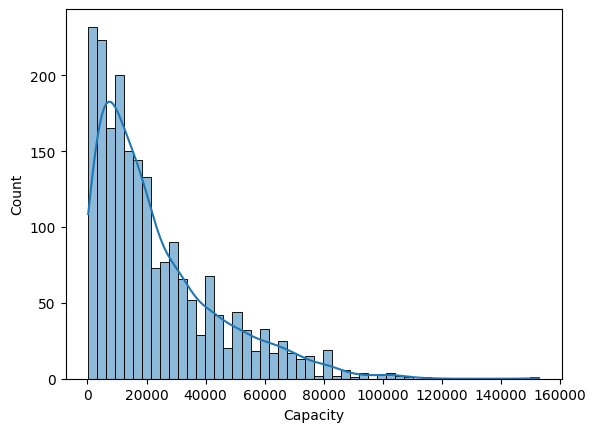

In [5]:
# Hình dạng phân bố dữ liệu là gì?
sns.histplot(df['Capacity'], kde = True, bins = 50)

{'whiskers': [<matplotlib.lines.Line2D at 0x1d5a165c2d0>,
 'caps': [<matplotlib.lines.Line2D at 0x1d5a165c550>,
 'boxes': [<matplotlib.patches.PathPatch at 0x1d59d4b3b60>],
 'medians': [<matplotlib.lines.Line2D at 0x1d5a165c7d0>],
 'fliers': [<matplotlib.lines.Line2D at 0x1d5a165c910>],
 'means': []}

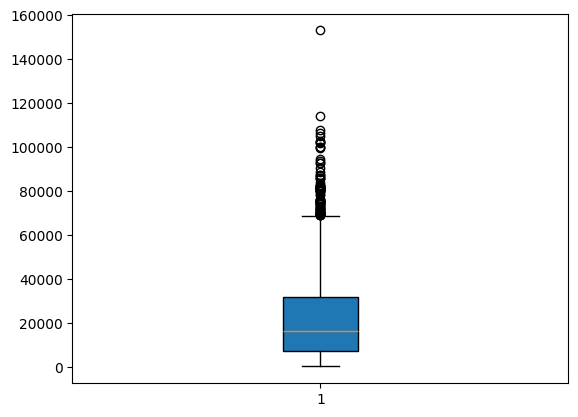

In [6]:
# Trực quan hóa dữ liệu: histogram, box plot, density plot,...
plt.boxplot(df['Capacity'], patch_artist=True)

In [7]:
# Tính toán: trung bình (mean), trung vị (median), độ lệch chuẩn (standard deviation)
print("Mean: ", round(np.mean(df['Capacity']),3))
print("Median: ", np.median(df['Capacity']))
print("Standard deviation: ", np.std(df['Capacity']))

Mean:  22905.075
Median:  16408.0
Standard deviation:  20723.44502146304


2. Range & Outliers:

In [8]:
# Giá trị nhỏ nhất và lớn nhất là bao nhiêu?
print("Min: ", np.min(df['Capacity']))
idx_min = df['Capacity'].idxmin()
print(df.loc[idx_min])

print("Max: ",np.max(df["Capacity"]))
idx_max = df['Capacity'].idxmax()
print(df.loc[idx_max])


Min:  244
Confederation                   UEFA
Stadium          Stadion OSiR Skałka
City                  Swietochlowice
HomeTeams                      Śląsk
Capacity                         244
Country                       Poland
IOC                              POL
Population                  38433600
Name: 1288, dtype: object
Max:  153000
Confederation                    CONCACAF
Stadium            Bristol Motor Speedway
City                              Bristol
HomeTeams                               -
Capacity                           153000
Country          United States of America
IOC                                   USA
Population                      325719178
Name: 1886, dtype: object


Câu hỏi: Các giá trị min/max có hợp lý không, hay cho thấy lỗi dữ liệu?  
Trả lời: 
- Giá trị max hợp lệ theo nguồn: [text](https://en.wikipedia.org/wiki/Bristol_Motor_Speedway)
- Giá trị min chưa hợp lệ theo nguồn: [text](https://en.wikipedia.org/wiki/Stadion_OSiR_Ska%C5%82ka)

In [9]:
# Xác định giá trị ngoại lai bằng Boxplot với IQR
Q1 = np.percentile(df['Capacity'], 25)
Q3 = np.percentile(df['Capacity'], 75)
IQR = Q3 - Q1

print("Q1 (25%):", Q1)
print("Q3 (75%):", Q3)
print("Khoảng IQR:", IQR)

lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

print("Lower bound:", lower_bound)
print("Upper bound:", upper_bound)

outliers = df[(df['Capacity'] < lower_bound) | (df['Capacity'] > upper_bound)]['Capacity']

num_outliers = outliers.shape[0]
print("\nSố lượng giá trị Outliers:", num_outliers)
print("\nOutliers: ")
print(outliers)


Q1 (25%): 7477.75
Q3 (75%): 32004.75
Khoảng IQR: 24527.0
Lower bound: -29312.75
Upper bound: 68795.25

Số lượng giá trị Outliers: 86

Outliers: 
42       83500
49      100024
82       69870
172      72888
184      78838
         ...  
1974     76125
1977     73379
1982    102321
1993     80250
2022     74500
Name: Capacity, Length: 86, dtype: int64


Câu hỏi: Các giá trị ngoại lai là cực trị thật hay lỗi nhập dữ liệu?  
Trả lời: 
- Vì giá trị min > lower bound nên không có outliers < lower bound
- Vì giá trị max > lower bound mà max hợp lệ nên outliers hợp lệ

3. Data Quality:

In [10]:
# Tỷ lệ giá trị bị thiếu là bao nhiêu phần trăm?
missing_counts = df['Capacity'].isna().sum()
missing_percentage = ((missing_counts)/len(df))*100

print('Số lượng missing values: ', missing_counts)
print(f"Phần trăm của missing values: {missing_percentage}")

Số lượng missing values:  0
Phần trăm của missing values: 0.0


In [11]:
# Có giá trị không thể xảy ra không? (ví dụ: tuổi âm, giá = 0, sức chứa âm, …)
invalid_capacity = df[df['Capacity']<=0]
print("Giá trị không hợp lệ: ")

if not invalid_capacity.empty:
    print(invalid_capacity)
else:
    print("Không có giá trị không hợp lệ")

Giá trị không hợp lệ: 
Không có giá trị không hợp lệ


In [12]:
# Có giá trị thay thế (placeholder) nào được dùng để biểu thị dữ liệu thiếu không? (ví dụ: 999, -1, 0, …)
placeholders = [-1,0]
placeholder_counts = 0
for capacity in df['Capacity']:
    if(capacity in placeholders):
        placeholder_counts +=1
print("Số lượng giá trị thay thế: ", placeholder_counts)

Số lượng giá trị thay thế:  0


`Population`:

1. Distribution & Central Tendency:

<Axes: xlabel='Population', ylabel='Count'>

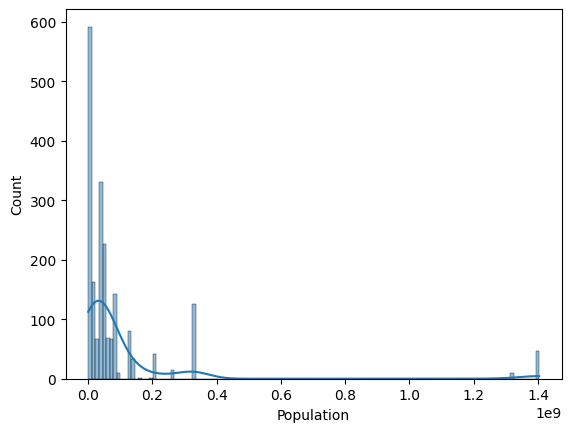

In [13]:
# Hình dạng phân bố dữ liệu là gì? (bình thường, lệch, hai đỉnh, đồng đều)
sns.histplot(df['Population'], kde = True)

{'whiskers': [<matplotlib.lines.Line2D at 0x1d5a1889f90>,
 'caps': [<matplotlib.lines.Line2D at 0x1d5a188a210>,
 'boxes': [<matplotlib.patches.PathPatch at 0x1d5a1889e50>],
 'medians': [<matplotlib.lines.Line2D at 0x1d5a188a490>],
 'fliers': [<matplotlib.lines.Line2D at 0x1d5a188a5d0>],
 'means': []}

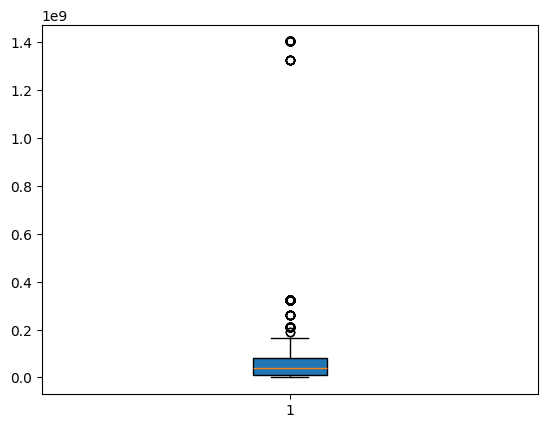

In [14]:
# Trực quan hóa dữ liệu: histogram, box plot, density plot,…
plt.boxplot(df['Population'], patch_artist=True)

In [15]:
# Tính toán: trung bình (mean), trung vị (median), độ lệch chuẩn (standard deviation)
print("Mean: ", round(np.mean(df['Population']),3))
print("Median: ", np.median(df['Population']))
print("Standard deviation: ", np.std(df['Population']))

Mean:  99649306.918
Median:  38433600.0
Standard deviation:  232553686.1586572


2. Range & Outliers:

In [16]:
# Giá trị nhỏ nhất và lớn nhất là bao nhiêu?
print("Min: ", np.min(df['Population']))
idx_min = df["Population"].idxmin()
print(df.loc[idx_min])

print("Max: ",np.max(df["Population"]))
idx_max = df["Population"].idxmax()
print(df.loc[idx_max])

Min:  32194
Confederation                UEFA
Stadium          Victoria Stadium
City                    Gibraltar
HomeTeams                       -
Capacity                     5000
Country                 Gibraltar
IOC                           GIB
Population                  32194
Name: 713, dtype: object
Max:  1403500365
Confederation               AFC
Stadium          Bao’an Stadium
City                   Shenzhen
HomeTeams                     -
Capacity                  40050
Country                   China
IOC                         CHN
Population           1403500365
Name: 248, dtype: object


Câu hỏi: Các giá trị min/max có hợp lý không, hay cho thấy lỗi dữ liệu?  
Trả lời: Hoàn toàn hợp lý với:
- Dân số lớn nhất: 1403500365 thuộc về China theo nguồn: [text](https://www.worldometers.info/world-population/china-population/)
- Dân số nhỏ nhất: 32194 thuộc về Gibraltar [text](https://www.worldometers.info/world-population/gibraltar-population/)

In [17]:
# Xác định giá trị ngoại lai bằng box plot, phương pháp IQR hoặc z-score
Q1 = np.percentile(df['Population'], 25)
Q3 = np.percentile(df['Population'], 75)
IQR = Q3 - Q1
print("Q1 (25th percentile):", Q1)
print("Q3 (75th percentile):", Q3)
print("IQR:", IQR)

lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

outliers = df[(df['Population'] < lower_bound) | (df['Population'] > upper_bound)]['Population']
num_outliers = outliers.shape[0]
print("Number of outliers:", num_outliers)
print("Outliers: ")
print(outliers)

Q1 (25th percentile): 10291027.0
Q3 (75th percentile): 80810525.0
IQR: 70519498.0
Number of outliers: 240
Outliers: 
143     210147125
144     210147125
145     210147125
146     210147125
147     210147125
          ...    
1991    325719178
1992    325719178
1993    325719178
1994    325719178
1995    325719178
Name: Population, Length: 240, dtype: int64


Câu hỏi: Các giá trị ngoại lai là cực trị thật hay lỗi nhập dữ liệu?  
Trả lời: Vì max, min hợp lệ nên outliers hợp lệ

3. Data Quality:

In [18]:
# Tỷ lệ giá trị bị thiếu là bao nhiêu phần trăm?
missing_counts = df['Population'].isna().sum()
missing_percentage = ((missing_counts)/len(df))*100

print('Số lượng missing values:', missing_counts)
print(f"Phần trăm missing values: {missing_percentage} %")

Số lượng missing values: 0
Phần trăm missing values: 0.0 %


In [19]:
# Có giá trị không thể xảy ra không? (ví dụ: tuổi âm, giá = 0, sức chứa âm, …)
invalid_capacity = df[df['Population']<=0]
print("Số giá trị không hợp lệ (ví dụ: tuổi âm, giá = 0, sức chứa âm, …): ")
if not invalid_capacity.empty:
    print(invalid_capacity)
else:
    print("Không có giá trị không hợp lệ")

Số giá trị không hợp lệ (ví dụ: tuổi âm, giá = 0, sức chứa âm, …): 
Không có giá trị không hợp lệ


In [20]:
# Có giá trị thay thế (placeholder) nào được dùng để biểu thị dữ liệu thiếu không? (ví dụ: 999, -1, 0, …)
placeholders = [-1,0]
placeholder_counts = 0
for capacity in df['Population']:
    if(capacity in placeholders):
        placeholder_counts +=1
print("Số giá trị thay thế: ", placeholder_counts)

Số giá trị thay thế:  0


### 2.4 Missing Data  
1. Đánh giá tổng quan:
- Tạo bảng thống kê giá trị thiếu (missing values): gồm tên cột, số lượng bị thiếu và phần trăm bị thiếu.
- Trực quan hóa mẫu hình dữ liệu bị thiếu bằng biểu đồ (heatmap hoặc bar chart).
- Xác định xem dữ liệu bị thiếu là ngẫu nhiên hay có quy luật:
    - Có nhóm hàng (rows) hoặc nhóm đặc trưng nào có nhiều giá trị thiếu hơn không?
2. Chiến lược xử lý theo từng cột:
- Với mỗi cột có giá trị bị thiếu:
    - Giải thích vì sao dữ liệu bị thiếu?
(ngẫu nhiên, không áp dụng cho trường hợp đó, lỗi thu thập dữ liệu,…)
    - Kế hoạch xử lý: (xoá giá trị thiếu, điền giá trị thay thế – impute, hoặc giữ chúng như một nhóm riêng biệt)

1. Overall Assessment:

In [21]:
# Tạo bảng thống kê giá trị thiếu (missing values): gồm tên cột, số lượng bị thiếu và phần trăm bị thiếu.
df = df.replace('-', np.nan)
missing_summary = df.isnull().sum().reset_index()
missing_summary.columns = ['Column', 'MissingCount']
missing_summary['MissingPercent'] = (missing_summary['MissingCount'] / len(df)) * 100
print("Bảng thống kê missing values: ")
print(missing_summary)

Bảng thống kê missing values: 
          Column  MissingCount  MissingPercent
0  Confederation             0        0.000000
1        Stadium             0        0.000000
2           City             0        0.000000
3      HomeTeams           204       10.079051
4       Capacity             0        0.000000
5        Country             0        0.000000
6            IOC             0        0.000000
7     Population             0        0.000000


Text(0.5, 1.0, 'Missing value heatmap')

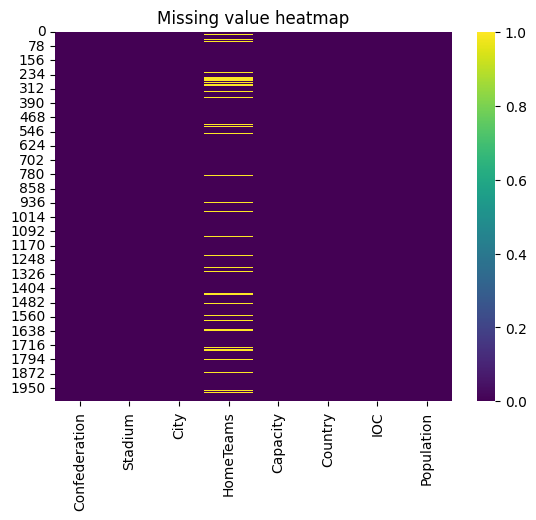

In [22]:
# Trực quan hóa mẫu hình dữ liệu bị thiếu bằng biểu đồ (heatmap hoặc bar chart).
sns.heatmap(df.isnull(), cmap="viridis")
plt.title('Missing value heatmap')

Câu hỏi: Xác định xem dữ liệu bị thiếu là ngẫu nhiên hay có quy luật?  
Trả lời: Tập trung ở HomeTeams

2. Chiến lược xử lý theo từng cột:

Với mỗi cột có giá trị bị thiếu:
- Giải thích vì sao dữ liệu bị thiếu?
  - Not applicable bởi vì không phải sân bóng lúc nào cũng có đội chủ nhà, nó có thể là sự tham gia của hai đội đến từ những quốc gia khác.
- Kế hoạch xử lý:
  - Xóa cột bởi vì sẽ phân tích dữ liệu theo hướng...

In [23]:
df = df.drop('HomeTeams', axis =1)
df.head()

,Confederation,Stadium,City,Capacity,Country,IOC,Population
0,UEFA,Stadiumi Besëlidhja,Lezhë,7000,Albania,ALB,2876591
1,UEFA,Stadiumi Flamurtari,Vlorë,8200,Albania,ALB,2876591
2,UEFA,Stadiumi Laçi,Laçi,5000,Albania,ALB,2876591
3,UEFA,Stadiumi Niko Dovana,Durrës,12040,Albania,ALB,2876591
4,UEFA,Stadiumi Selman Stërmasi,Tirana,9500,Albania,ALB,2876591


### Quan hệ giữa các biến (Relationships & Correlations)
- Tạo ma trận tương quan cho các cột số.
- So sánh Capacity theo Region/Opened.


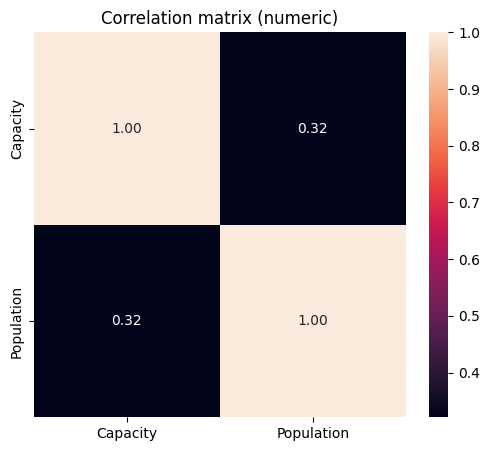

In [24]:
import seaborn as sns

if 'df' in globals():
    numeric = df.select_dtypes(include=['number'])
    if not numeric.empty:
        plt.figure(figsize=(6,5))
        sns.heatmap(numeric.corr(), annot=True, fmt='.2f')
        plt.title('Correlation matrix (numeric)')
        plt.show()
    else:
        print('Không tìm thấy cột số nào để tính corr.')
else:
    print('Chưa có dataframe `df`.')


## 2.6 Initial Observations & Insights
1. Tóm tắt
- Tóm tắt các điểm nổi bật:
  - Bộ dữ liệu chứa 2.024 sân vận động, phân bố trên nhiều quốc gia và thuộc nhiều liên đoàn bóng đá (Confederation), tạo điều kiện phân tích đa dạng khu vực.
  - Các trường dữ liệu được điền đầy đủ (không có giá trị thiếu), bao gồm thông tin về sức chứa, đội chủ nhà và dân số quốc gia → thuận lợi cho xử lý và phân tích thống kê.
  - Trường Capacity (sức chứa) là dữ liệu số (int64) với độ biến thiên rất lớn — từ vài nghìn đến hàng trăm nghìn chỗ ngồi — cho thấy sự chênh lệch rõ rệt giữa các sân địa phương và sân vận động quốc gia quy mô lớn.
- Vấn đề chất lượng dữ liệu đã phát hiện:
  - Bộ dữ liệu không có toạ độ địa lý (latitude, longitude), gây khó khăn cho việc trực quan hóa các sân vận động trên bản đồ hoặc phân tích theo vị trí không gian.
- Các bước tiền xử lý cần thiết:
  - Tách dữ liệu quốc gia (Country, IOC, Population) thành một bảng riêng để tránh trùng lặp thông tin, hỗ trợ phân tích theo quốc gia và thuận tiện cho việc nối (merge) sau này.
- Các mẫu hình thú vị dẫn đến câu hỏi nghiên cứu:
  - Một số quốc gia dân số thấp nhưng sở hữu nhiều sân vận động lớn, có thể phản ánh mức độ đầu tư vào thể thao cao — ví dụ như Qatar hoặc Iceland → Điều này mở ra câu hỏi nghiên cứu: “Các yếu tố kinh tế – xã hội nào liên quan đến quy mô và mật độ sân vận động của một quốc gia?”

2. Cảnh báo dữ liệu (Red Flags)
- Các vấn đề nghiêm trọng về chất lượng dữ liệu:
  - Dữ liệu Population trùng lặp trong mỗi quốc gia -> không hữu ích khi tính trung bình.
  - HomeTeams chứa nhiều đội trong cùng một ô -> gây sai lệch khi đếm số CLB.
  - Dataset không ghi rõ năm cập nhật dân số → có thể lệch so với hiện tại.
- Các hạn chế có thể ảnh hưởng đến phân tích:
  - Không thể phân tích yếu tố thời gian hoặc xu hướng phát triển.
  - Không thể xác định vị trí chính xác của sân vận động.
  - Không có thông tin về loại sân, tình trạng sử dụng, hay giá trị thương mại.

## 3. Research Questions (6 câu cho nhóm 3 người)

Dưới đây là 6 câu hỏi gợi ý — copy vào báo cáo và thực hiện phân tích cho từng câu.

1. Quốc gia nào có nhiều sân vận động nhất? (Descriptive)
2. Phân bố sức chứa (Capacity) trên toàn cầu như thế nào? (Descriptive)
3. Liệu các sân mới (Opened gần đây) có xu hướng có sức chứa lớn hơn không? (Correlation)
4. So sánh độ tuổi trung bình của sân theo từng Region (Comparative)
5. (ML) Dự đoán `Capacity` dựa trên `Opened`, `Region`, `Country` (Regression)
6. Các sân tổ chức sự kiện lớn (World Cup, Euro) khác biệt như thế nào về capacity và vị trí? (Analytical)

Mỗi câu nên có: Motivation, Preprocessing, Code, Visualization, Result & Interpretation.


,Country,Count
0,Poland,242
1,United States of America,126
2,England,116
3,Germany,98
4,Spain,72
5,France,61
6,Italy,52
7,Japan,50
8,China,47
9,Brazil,42


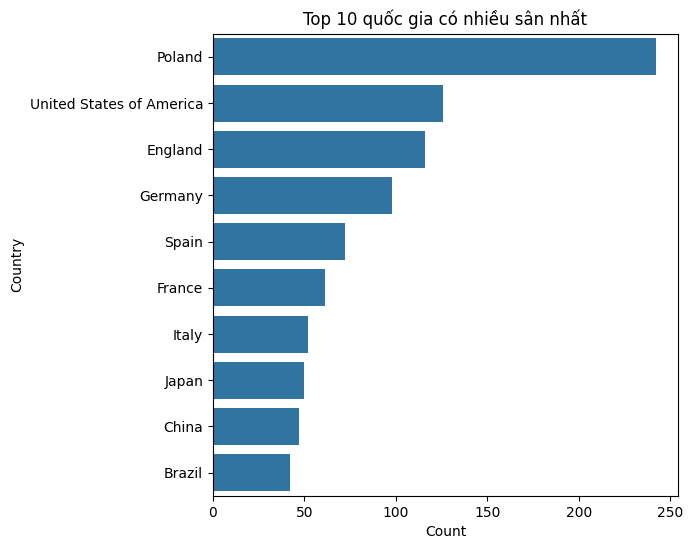

In [25]:
# Mẫu code để trả lời 1 câu: (ví dụ câu 1)
if 'df' in globals():
    q1 = df['Country'].value_counts().reset_index()
    q1.columns = ['Country','Count']
    display(q1.head(20))
    # Vẽ bar chart top 10
    plt.figure(figsize=(6,6))
    sns.barplot(y='Country', x='Count', data=q1.head(10))
    plt.title('Top 10 quốc gia có nhiều sân nhất')
    plt.show()
else:
    print('Chưa có dataframe `df`.')


## 4. Machine Learning (ví dụ: Regression cho Capacity)

Gợi ý: sử dụng LinearRegression và một model tree-based (RandomForest) để so sánh.
Metrics: MAE, RMSE, R².


In [26]:
# --- Mẫu ML: dự đoán Capacity ---
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

if 'df' in globals():
    # Chuẩn bị dữ liệu (ví dụ đơn giản)
    tmp = df.copy()
    # Loại bỏ hàng thiếu Capacity hoặc Opened
    if 'Capacity' in tmp.columns and 'Opened' in tmp.columns:
        tmp = tmp.dropna(subset=['Capacity','Opened'])
        # Chuyển Region sang dummies nếu có
        X = tmp[['Opened']].copy()
        if 'Region' in tmp.columns:
            X = pd.concat([X, pd.get_dummies(tmp['Region'], prefix='Reg', drop_first=True)], axis=1)
        y = tmp['Capacity']

        X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

        lr = LinearRegression()
        lr.fit(X_train, y_train)
        y_pred = lr.predict(X_test)

        print('Linear Regression MAE:', mean_absolute_error(y_test, y_pred))
        print('Linear Regression R2:', r2_score(y_test, y_pred))

        rf = RandomForestRegressor(n_estimators=100, random_state=42)
        rf.fit(X_train, y_train)
        y_pred_rf = rf.predict(X_test)
        print('RandomForest MAE:', mean_absolute_error(y_test, y_pred_rf))
        print('RandomForest R2:', r2_score(y_test, y_pred_rf))
    else:
        print('Cần có cột Capacity và Opened để chạy mẫu ML.')
else:
    print('Chưa có dataframe `df`.')


Cần có cột Capacity và Opened để chạy mẫu ML.


## 5. Kết luận, Limitations và Hướng phát triển

- **Key findings**: (liệt kê 3-5 insight quan trọng từ phân tích)
- **Limitations**: dữ liệu thiếu, bias, không có biến quan trọng như chi phí, tình trạng sân
- **Future work**: thêm data host events, scrape lịch sử World Cup/Olympic, phân tích không gian (spatial)

---

## 6. Gửi nộp
- README.md: mô tả dataset, cách chạy notebook, câu hỏi nghiên cứu.
- Nộp file `Football_Stadiums_Project.ipynb` và CSV nguồn.
